# Quantum Circuits

## Contents

1. [Introduction](#intro)
2. [What is a Quantum Circuit?](#whatis)
3. [Example: Quantum Teleportation](#teleportation)
4. [Example: Variational Quantum Eigensolvers](#vqe)
5. [Why the Classical Parts?](#why-classical)

## 1. Introduction <a id='intro'></a>

So far, we have seen various [single-qubit](/course/ch-states/single-qubit-gates) and [multi-qubit](/course/ch-gates/introduction) gates. We have also seen how to use these gates in concert with other components to build quantum circuits. 

Before implementing quantum algorithms on real quantum computers, it is important to highlight the definition of a quantum circuit concretely, as we will be building quantum circuits to implement these algorithms.


## 2. What is a Quantum Circuit? <a id='whatis'></a>

A quantum circuit is a computational routine consisting of _coherent quantum operations on quantum data, such as qubits, and concurrent real-time classical computation_. It is an ordered sequence of _quantum gates,_ _measurements and resets,_ all of which may be conditioned on and use data from the real-time classical computation. 

A set of quantum gates is said to be [universal](/course/ch-gates/proving-universality) if any unitary transformation of the quantum data can be efficiently approximated arbitrarily well as a sequence of gates in the set. Any quantum program can be represented by a sequence of quantum circuits and non-concurrent classical computation.

## 3. Example: Quantum Teleportation <a id='teleportation'></a>

Take a look at the quantum circuit below. You will learn later in this chapter that it implements [the quantum teleportation algorithm](/course/ch-algorithms/quantum-teleportation). For now, it suffices to look at the components of the quantum circuit.

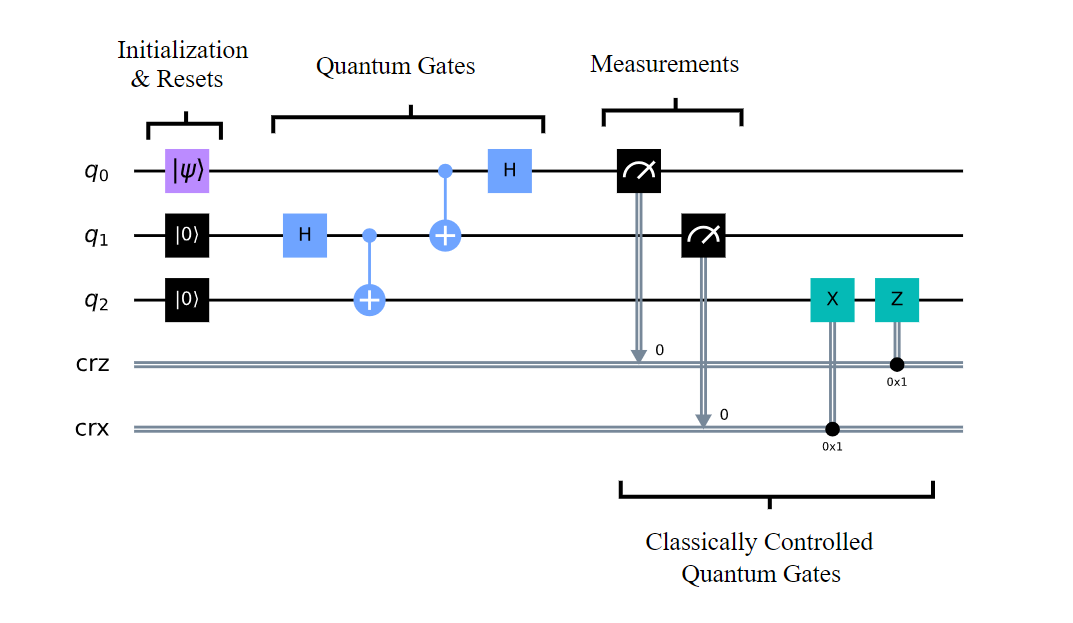

The quantum circuit uses three qubits and two classical bits. There are four main components in this quantum circuit. 

### Initialization and reset
First, we need to start our quantum computation with a well-defined quantum state. This is achieved using the initialization and reset operations. The resets can be performed by a combination of single-qubit gates and concurrent real-time classical computation that monitors whether we have successfully created the desired state through measurements. The initialization of $q_0$ into a desired state $\vert\psi\rangle$ can then follow by applying single-qubit gates.

### Quantum gates
Second, we apply a sequence of quantum gates that manipulate the three qubits as required by the teleportation algorithm. In this case, we only need to apply single-qubit Hadamard ($H$) and two-qubit Controlled-X ($\oplus$) gates.  

### Measurements
Third, we measure two of the three qubits. A classical computer interprets the measurements of each qubit as classical outcomes (0 and 1) and stores them in the two classical bits.

### Classically conditioned quantum gates
Fourth, we apply single-qubit $Z$ and $X$ quantum gates on the third qubit. These gates are conditioned on the results of the measurements that are stored in the two classical bits. In this case, we are using the results of the classical computation concurrently in real-time within the same quantum circuit.

## 4. Example: Variational Quantum Eigensolvers <a id='vqe'></a>

Here is an example of a quantum program. You will learn in following chapters that it implements a [variational quantum eigensolver](/course/ch-applications/simulating-molecules-using-vqe). In this program, a classical computer works _non-concurrently_ in concert with a quantum computer.

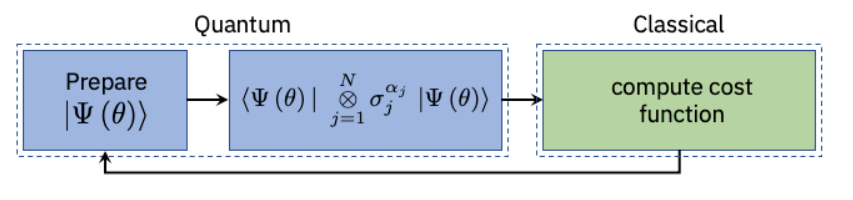

### The quantum block
As with the quantum teleportation example above, a quantum state $\vert\Psi(\theta)\rangle$ is prepared by a combination of resets with single- and multi-qubit quantum gates. Here, the parameters of the state are parameterized using the quantity $\theta$. Once prepared, the quantum state is then manipulated using quantum gates and measured. All of the operations within the quantum block consist of quantum circuits.

### The classical block
Once the quantum state has been measured, a classical computer interprets those measurement outcomes and computes their cost using a cost function that has been chosen for the intended application. Based on this cost, the classical computer determines another value for the parameter $\theta$.

### Combined operation
Once the classical computer determines the next parameter for $\theta$, a sequence of resets, single- and multi-qubit quantum gates are used in a quantum circuit to prepare $\vert\Psi(\theta)\rangle$, and this process continues until the cost of the measured quantum states stabilizes, or until another pre-determined outcome is met.

## 5. Why the Classical Parts? <a id='why-classical'></a>

While a universal quantum computer can do anything any classical computer can, we often add classical parts to our quantum circuits because quantum states are fragile.

When we measure the qubit, we collapse its state and destroy a lot of the information. Since all measurement does is destroy information, we can in theory always measure last and lose no computational advantage. In reality, measuring early offers many practical advantages.

For example, in the teleportation circuit, we measure the qubits so we can send the information over classical channels instead of quantum channels. The advantage is that classical channels are very stable, while we don’t really have a way of sending quantum information to other people since the channels are so difficult to create.

In the variational quantum eigensolver example, splitting the computation up into smaller quantum computations actually loses us some computational advantage, but makes up for this on noisy hardware by reducing the time our qubits are in superposition. This means there is less chance interference will introduce inaccuracies in our results.

Finally, to use the results of our quantum computation in our classical, everyday world, we need to measure and interpret these states at the end of our computation.
